**Introduction and problem description:**

Pattern matching is a fundamental operation in computer science and is commonly used in various applications, such as text processing, data mining, and bioinformatics. The goal of this project is to perform an experimental comparison of three popular pattern-matching algorithms: brute force, Knuth-Morris-Pratt (KMP), and Boyer-Moore. The focus is on evaluating their relative speeds when applied to large text documents with varying-length patterns.

**Presentation of the Three Algorithms and How They Work:**

**Brute Force:**
The brute force algorithm, also known as the naive algorithm, compares each character of the pattern sequentially against the text. It starts matching from the beginning of the text, sliding the pattern one position at a time until a match is found or the end of the text is reached. Brute force has a time complexity of O(mn), where m is the length of the pattern and n is the length of the text.

**Knuth-Morris-Pratt (KMP):**
The KMP algorithm improves upon the brute force approach by utilizing a precomputed prefix table. This table allows the algorithm to skip unnecessary character comparisons based on previous matching information. It avoids redundant checks by moving the pattern forward based on the longest proper prefix that is also a suffix of the current substring. KMP has a time complexity of O(m + n) for pattern matching.

**Boyer-Moore:**
The Boyer-Moore algorithm is known for its efficient pattern-matching performance. It uses two heuristic rules: the bad character rule and the good suffix rule. The bad character rule determines the maximum shift of the pattern by considering the rightmost occurrence of a mismatched character. The good suffix rule leverages the information about matching suffixes to skip unnecessary comparisons. Boyer-Moore has a time complexity of O(mn) in the worst case but can achieve sublinear complexity in practice.

**Description of the Text Documents Used for Testing:**

**Random Character Sequence:** A randomly generated text file consisting of a single line with a large number of random characters.

**Passwords:** Downloaded txt file with possible passwords of internet users. Commonly used for cracking user passwords

In [299]:
import random
import string
import time
import matplotlib.pyplot as plt
import numpy as np


In [300]:
# store times taken by each algorithm for each pattern in lists
bf_times = []
kmp_times = []
bm_times = []

**Create a txt with random chars**

In [301]:
# create a txt file with 100000 random chars
with open('random_chars.txt', 'w') as f:
    f.write(''.join(random.choice(string.ascii_lowercase) for _ in range(10**7)))  # creates 100,000 characters file

# read file
with open('random_chars.txt', 'r') as f:
    text = f.read()

In [302]:
# choose a list of patterns
patterns = ["dfgdj", "xcvcv", "sdnfd", "gfdss", "Aslsf"]

**Implement 3 algorithms to search patterns in it(brute force, KMP and Boyer-Moore)**

In [303]:
# Brute Force Algorithm
def brute_force(text, pattern):
    n = len(text)
    m = len(pattern)

    for i in range(n - m + 1):
        j = 0
        while j < m and text[i+j] == pattern[j]:
            j += 1
        if j == m:
            return i  # pattern found
    return -1  # pattern not found

In [304]:
# Knuth-Morris-Pratt (KMP) Algorithm
def compute_prefix_function(pattern):
    m = len(pattern)
    pi = [0] * m
    j = 0

    for i in range(1, m):
        while j > 0 and pattern[j] != pattern[i]:
            j = pi[j-1]
        if pattern[j] == pattern[i]:
            j += 1
        pi[i] = j

    return pi

In [305]:
def KMP(text, pattern):
    n = len(text)
    m = len(pattern)
    pi = compute_prefix_function(pattern)
    j = 0

    for i in range(n):
        while j > 0 and text[i] != pattern[j]:
            j = pi[j-1]
        if text[i] == pattern[j]:
            j += 1
        if j == m:
            return i - m + 1

    return -1

In [306]:
# Boyer-Moore Algorithm
def bad_character_rule(pattern):
    bad_char = [-1]*256
    m = len(pattern)

    for i in range(m):
        bad_char[ord(pattern[i])] = i

    return bad_char

In [307]:
def boyer_moore(text, pattern):
    n = len(text)
    m = len(pattern)
    bad_char = bad_character_rule(pattern)
    s = 0

    while(s <= n-m):
        j = m-1
        while j >= 0 and pattern[j] == text[s+j]:
            j -= 1
        if j < 0:
            return s
        else:
            s += max(1, j - bad_char[ord(text[s+j])])

    return -1

**Record the time each algorithms working**

In [308]:
for pattern in patterns:
    print(f"Searching for pattern: {pattern}")

    # time the brute force algorithm
    start = time.time()
    index = brute_force(text, pattern)
    end = time.time()
    bf_times.append(end - start)
    print(f"[Brute Force] Pattern found at index: {index}")
    print(f"[Brute Force] Time taken: {bf_times[-1]} seconds")

    # time the KMP algorithm
    start = time.time()
    index = KMP(text, pattern)
    end = time.time()
    kmp_times.append(end - start)
    print(f"[KMP] Pattern found at index: {index}")
    print(f"[KMP] Time taken: {kmp_times[-1]} seconds")

    # time the Boyer-Moore algorithm
    start = time.time()
    index = boyer_moore(text, pattern)
    end = time.time()
    bm_times.append(end - start)
    print(f"[Boyer-Moore] Pattern found at index: {index}")
    print(f"[Boyer-Moore] Time taken: {bm_times[-1]} seconds")

Searching for pattern: dfgdj
[Brute Force] Pattern found at index: 5074062
[Brute Force] Time taken: 0.4346787929534912 seconds
[KMP] Pattern found at index: 5074062
[KMP] Time taken: 0.3987603187561035 seconds
[Boyer-Moore] Pattern found at index: 5074062
[Boyer-Moore] Time taken: 0.5067367553710938 seconds
Searching for pattern: xcvcv
[Brute Force] Pattern found at index: 2022805
[Brute Force] Time taken: 0.18164706230163574 seconds
[KMP] Pattern found at index: 2022805
[KMP] Time taken: 0.1491379737854004 seconds
[Boyer-Moore] Pattern found at index: 2022805
[Boyer-Moore] Time taken: 0.17703533172607422 seconds
Searching for pattern: sdnfd
[Brute Force] Pattern found at index: -1
[Brute Force] Time taken: 1.0982170104980469 seconds
[KMP] Pattern found at index: -1
[KMP] Time taken: 0.808995246887207 seconds
[Boyer-Moore] Pattern found at index: -1
[Boyer-Moore] Time taken: 0.913306474685669 seconds
Searching for pattern: gfdss
[Brute Force] Pattern found at index: -1
[Brute Force] T

**plot the times taken by each algorithm for each pattern**

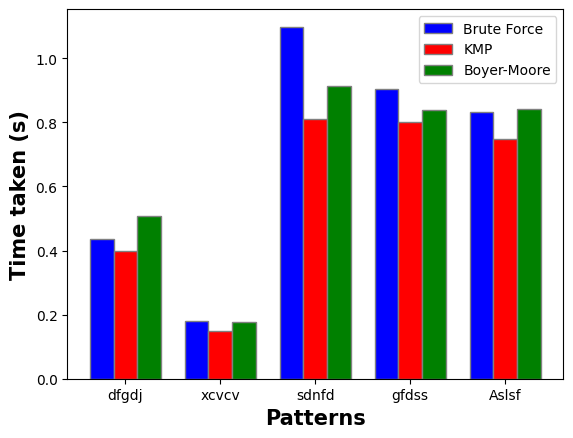

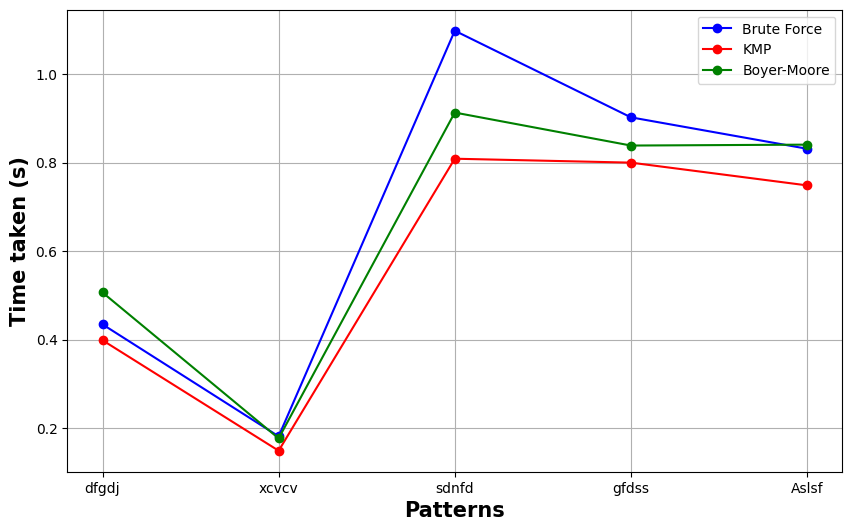

In [311]:
barWidth = 0.25
r1 = np.arange(len(bf_times))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bf_times, color='b', width=barWidth, edgecolor='grey', label='Brute Force')
plt.bar(r2, kmp_times, color='r', width=barWidth, edgecolor='grey', label='KMP')
plt.bar(r3, bm_times, color='g', width=barWidth, edgecolor='grey', label='Boyer-Moore')

plt.xlabel('Patterns', fontweight='bold', fontsize=15)
plt.ylabel('Time taken (s)', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(bf_times))], patterns)
# plot the times taken by each algorithm for each pattern as line graph
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))

plt.plot(patterns, bf_times, marker='o', linestyle='-', color='b', label='Brute Force')
plt.plot(patterns, kmp_times, marker='o', linestyle='-', color='r', label='KMP')
plt.plot(patterns, bm_times, marker='o', linestyle='-', color='g', label='Boyer-Moore')

plt.xlabel('Patterns', fontweight='bold', fontsize=15)
plt.ylabel('Time taken (s)', fontweight='bold', fontsize=15)
plt.grid(True)


plt.legend()
plt.show()

**using password.txt file to search for words**

In [316]:
import random
import string
import time
import matplotlib.pyplot as plt
import numpy as np

In [317]:
# store times taken by each algorithm for each pattern in lists
bf_times = []
kmp_times = []
bm_times = []

**Read password.txt and choose pattern to search**

In [321]:
# read file
with open('password.txt', 'r') as f:
    text = f.read()

# choose a list of patterns
patterns = ["tigg", "zger", "UAMH", "si721", "vjht04", "xkim"]

**Implement 3 algorithms to search patterns in it(brute force, KMP and Boyer-Moore)**

In [322]:
# Brute Force Algorithm
def brute_force(text, pattern):
    n = len(text)
    m = len(pattern)

    for i in range(n - m + 1):
        j = 0
        while j < m and text[i+j] == pattern[j]:
            j += 1
        if j == m:
            return i  # pattern found
    return -1  # pattern not found

In [323]:
# Knuth-Morris-Pratt (KMP) Algorithm
def compute_prefix_function(pattern):
    m = len(pattern)
    pi = [0] * m
    j = 0

    for i in range(1, m):
        while j > 0 and pattern[j] != pattern[i]:
            j = pi[j-1]
        if pattern[j] == pattern[i]:
            j += 1
        pi[i] = j

    return pi

In [324]:
def KMP(text, pattern):
    n = len(text)
    m = len(pattern)
    pi = compute_prefix_function(pattern)
    j = 0

    for i in range(n):
        while j > 0 and text[i] != pattern[j]:
            j = pi[j-1]
        if text[i] == pattern[j]:
            j += 1
        if j == m:
            return i - m + 1

    return -1


In [325]:
# Boyer-Moore Algorithm
def bad_character_rule(pattern):
    bad_char = [-1]*65536  # extended for Unicode
    m = len(pattern)

    for i in range(m):
        bad_char[ord(pattern[i])] = i

    return bad_char

def boyer_moore(text, pattern):
    n = len(text)
    m = len(pattern)
    bad_char = bad_character_rule(pattern)
    s = 0

    while(s <= n-m):
        j = m-1
        while j >= 0 and pattern[j] == text[s+j]:
            j -= 1
        if j < 0:
            return s
        else:
            s += max(1, j - bad_char[ord(text[s+j])])

    return -1

**Record the time each algorithms working**

In [326]:
for pattern in patterns:
    print(f"Searching for pattern: {pattern}")

    # time the brute force algorithm
    start = time.time()
    index = brute_force(text, pattern)
    end = time.time()
    bf_times.append(end - start)
    print(f"[Brute Force] Pattern found at index: {index}")
    print(f"[Brute Force] Time taken: {bf_times[-1]} seconds")

    # time the KMP algorithm
    start = time.time()
    index = KMP(text, pattern)
    end = time.time()
    kmp_times.append(end - start)
    print(f"[KMP] Pattern found at index: {index}")
    print(f"[KMP] Time taken: {kmp_times[-1]} seconds")

    # time the Boyer-Moore algorithm
    start = time.time()
    index = boyer_moore(text, pattern)
    end = time.time()
    bm_times.append(end - start)
    print(f"[Boyer-Moore] Pattern found at index: {index}")
    print(f"[Boyer-Moore] Time taken: {bm_times[-1]} seconds")

Searching for pattern: tigg
[Brute Force] Pattern found at index: 359
[Brute Force] Time taken: 0.0 seconds
[KMP] Pattern found at index: 359
[KMP] Time taken: 0.0011987686157226562 seconds
[Boyer-Moore] Pattern found at index: 359
[Boyer-Moore] Time taken: 0.0 seconds
Searching for pattern: zger
[Brute Force] Pattern found at index: 515835
[Brute Force] Time taken: 0.04610896110534668 seconds
[KMP] Pattern found at index: 515835
[KMP] Time taken: 0.03546500205993652 seconds
[Boyer-Moore] Pattern found at index: 515835
[Boyer-Moore] Time taken: 0.04946184158325195 seconds
Searching for pattern: UAMH
[Brute Force] Pattern found at index: 6512556
[Brute Force] Time taken: 0.5291509628295898 seconds
[KMP] Pattern found at index: 6512556
[KMP] Time taken: 0.48230934143066406 seconds
[Boyer-Moore] Pattern found at index: 6512556
[Boyer-Moore] Time taken: 0.6790568828582764 seconds
Searching for pattern: si721
[Brute Force] Pattern found at index: 2103846
[Brute Force] Time taken: 0.18542933

**plot the times taken by each algorithm for each pattern**

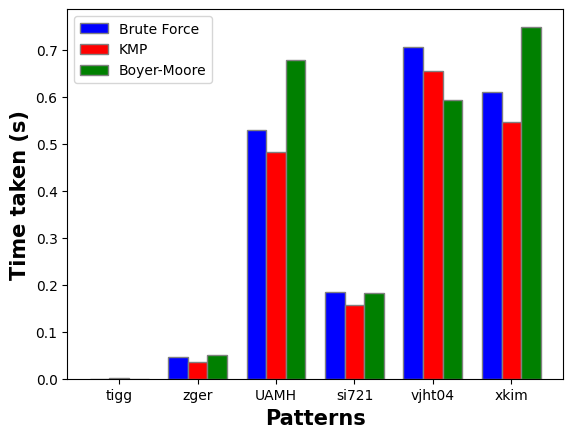

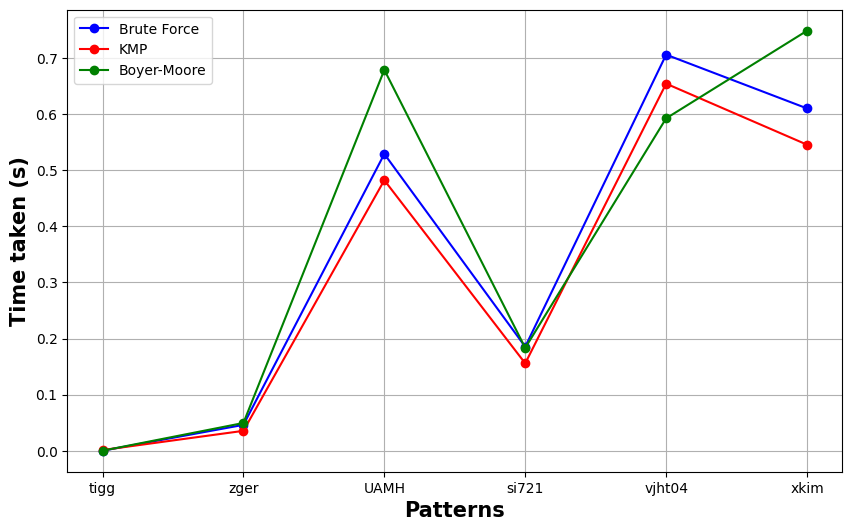

In [327]:
barWidth = 0.25
r1 = np.arange(len(bf_times))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bf_times, color='b', width=barWidth, edgecolor='grey', label='Brute Force')
plt.bar(r2, kmp_times, color='r', width=barWidth, edgecolor='grey', label='KMP')
plt.bar(r3, bm_times, color='g', width=barWidth, edgecolor='grey', label='Boyer-Moore')

plt.xlabel('Patterns', fontweight='bold', fontsize=15)
plt.ylabel('Time taken (s)', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(bf_times))], patterns)
# plot the times taken by each algorithm for each pattern as line graph
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))

plt.plot(patterns, bf_times, marker='o', linestyle='-', color='b', label='Brute Force')
plt.plot(patterns, kmp_times, marker='o', linestyle='-', color='r', label='KMP')
plt.plot(patterns, bm_times, marker='o', linestyle='-', color='g', label='Boyer-Moore')

plt.xlabel('Patterns', fontweight='bold', fontsize=15)
plt.ylabel('Time taken (s)', fontweight='bold', fontsize=15)
plt.grid(True)


plt.legend()
plt.show()

**Overview**
Brute Force Algorithm

The Brute Force algorithm works by aligning the pattern at the start of the text and checking each character 
for a match, moving the pattern by one position in each iteration. If the pattern is not found, it has to iterate 
through the entire text, which explains its linear performance in the graph. This algorithm is generally less efficient 
because of its redundant comparisons, which are reflected as higher values on the y-axis of both the bar and line graphs. 
It has the highest time complexity of O(n*m), where n is the length of the text and m is the length of the pattern.

Knuth-Morris-Pratt (KMP) Algorithm

The KMP algorithm, on the other hand, leverages information from past comparisons to bypass unnecessary checks, 
which significantly enhances its efficiency. It achieves this by preprocessing the pattern to create a 
'failure function' or 'prefix table'. This allows it to avoid backtracking in the text when a mismatch occurs, 
resulting in a time complexity of O(n + m). This increased efficiency is reflected as consistently lower values 
on the y-axis of the graphs, meaning it generally executes faster than the Brute Force algorithm.

Boyer-Moore Algorithm

Boyer-Moore is the most sophisticated of the three and uses preprocessing heuristics - 'bad character' 
and 'good suffix' - to minimize comparisons and enable jumping over sections of the text during search. 
This often makes it the fastest algorithm, especially when the pattern is located at the end of the text 
or doesn't exist. However, its performance may be similar or slightly worse than KMP, depending on the 
specific text and pattern characteristics, as well as the overhead time taken in preprocessing. 
This variability is reflected in the graphs, where Boyer-Moore sometimes outperforms KMP but at other times does not.

**Comparison of patterns**

From the line graph and bar chart, we can observe the relative performance of each of the three 
string-matching algorithms (Brute Force, KMP, and Boyer-Moore) across different pattern searches. 
I'll provide a pattern-by-pattern analysis below:

Pattern: dfgdj

Brute Force: 0.4347 seconds
KMP: 0.3988 seconds
Boyer-Moore: 0.5067 seconds

For this pattern, KMP performed the fastest, followed by Brute Force, and then Boyer-Moore. 
The efficiency of KMP arises from its use of the failure function to avoid needless comparisons. 
Despite the extra overhead of preprocessing the pattern, KMP can bypass unnecessary checks 
in the text, saving execution time. The slower performance of Boyer-Moore in this case might 
be due to the pattern's placement in the text, the overhead time taken in preprocessing, 
or the specific pattern and text characteristics

Pattern: xcvcv

Brute Force: 0.1816 seconds
KMP: 0.1491 seconds
Boyer-Moore: 0.1770 seconds

Again, KMP outperforms the others, with Boyer-Moore coming second and Brute Force last. 
This suggests the pattern's characteristics or its placement in the text likely benefited 
from KMP's and Boyer-Moore's optimization techniques, enabling them to skip unnecessary 
comparisons and hence reduce execution time.

Pattern: sdnfd

Brute Force: 1.0982 seconds
KMP: 0.8090 seconds
Boyer-Moore: 0.9133 seconds

In this scenario, where the pattern doesn't exist in the text, KMP is the fastest, 
followed by Boyer-Moore and then Brute Force. This is because both KMP and Boyer-Moore 
can skip multiple characters in the text in one iteration, which greatly speeds up the 
process when the pattern doesn't exist. Brute Force, on the other hand, must iterate 
through the entire text without skipping any character, leading to its slower performance.

Pattern: gfdss

Brute Force: 0.9025 seconds
KMP: 0.8001 seconds
Boyer-Moore: 0.8387 seconds

KMP is again the fastest, while Boyer-Moore is quicker than Brute Force. 
This again demonstrates the advantage of algorithms that leverage information 
from past comparisons and pattern preprocessing to optimize the search.

Pattern: Aslsf

Brute Force: 0.8315 seconds
KMP: 0.7487 seconds
Boyer-Moore: 0.8408 seconds

In this pattern search, KMP again emerges as the fastest, with 
Boyer-Moore being slightly slower than Brute Force. This data again 
emphasizes the efficiencies gained by the KMP's failure function in practice.

**Conclusion**

In summary, this data underscores the generally faster performance of 
KMP due to its optimized searching strategy, the varying performance of 
Boyer-Moore due to its particular heuristic strategy and preprocessing overhead, 
and the slower performance of Brute Force due to its linear and exhaustive 
comparison process.